In [1]:
from ops import functions
import ast
from collections import Counter
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from spacy.lang.en import English
from spacy.matcher import Matcher
from spacy.matcher import DependencyMatcher
from spacy.matcher import PhraseMatcher

In [3]:
import spacy
from spacy import displacy

In [4]:
# Load the small English model
nlp = spacy.load("en_core_web_lg")
ruler = nlp.add_pipe("entity_ruler")

# spaCy Tutorial

Using the housing sentence case study for learning more about spaCy. The following notebook will use the demo from: https://applied-language-technology.mooc.fi/html/notebooks/part_iii/03_pattern_matching.html

In [5]:
housing_subset = pd.read_csv("../../data/character_sentences.csv")

In [10]:
housing_subset.head()

,Unnamed: 0,obj_id,video_url,author,publish_date,title,topic,fullTranscript,word_count,length,topic_label,topic_label_count,topic_count,neighbourhood.character,character.of.the.neighbourhood,character_total,key_sentence
0,0,5fe7e244539a4d487dc18b84,https://www.youtube.com/watch?v=-VJlUUt2Enc,Manhattan Community Board 5,2020-07-20,"JOINT Land Use, Housing & Zoning/Transportatio...","[[0.4267498254776001, 'Transportation'], [0.10...","You good evening, everyone it's 6 p.m.\nwe're ...","{'scope': 18, 'project': 8, 'space': 9, 'propo...",2:57:02,character,1,{'\\bneighbou?rhood.character\\b': 1},1.0,NaN,1.0,['My name is Leila Lopes echo and the chair of...
1,1,5fe7e246539a4d487dc18bc5,https://www.youtube.com/watch?v=XLDAQb2sIlQ,Brooklyn Community Board 10,2020-10-30,Zoning and Land Use Committee Public Meeting,"[[0.3792112171649933, 'Zoning'], [0.3115428388...","Okay, Madam chair, we are now on live stream g...","{'building': 11, 'zoning': 11, 'hotel': 8, 'st...",1:44:30,character,1,{'\\bneighbou?rhood.character\\b': 1},1.0,NaN,1.0,['We will turn it over to Richard Labelle and ...
2,2,5fe7e246539a4d487dc18bd3,https://www.youtube.com/watch?v=qHlUWGgJSjM,Manhattan Community Board 12,2020-12-03,Land Use,"[[0.6146698594093323, 'Zoning'], [0.0846309512...","I am speaking: oh wait, I hear you right now. ...","{'flood': 14, 'building': 7, 'buildings': 7, '...",1:38:35,character,1,{'\\bneighbou?rhood.character\\b': 1},1.0,NaN,1.0,['So our outcome- our ultimate outcome for thi...
3,3,5fe7e246539a4d487dc18be2,https://www.youtube.com/watch?v=fBodUwBijwE,Manhattan Community Board 5,2020-12-03,"Land Use, Housing & Zoning Committee Meeting","[[0.5768762826919556, 'Zoning'], [0.1188126057...","Hi, sorry for speaking, I'm just making sure A...","{'building': 34, 'space': 20, 'floor': 11, 'fe...",3:51:20,character,1,{'\\bcharacter.of.the.neighbou?rhood\\b': 1},NaN,1.0,1.0,"['This is the land use, housing and zoning com..."
4,4,5fe7e248539a4d487dc18c0c,https://www.youtube.com/watch?v=IStiEbCSeHY,Brooklyn Community Board 10,2020-06-09,Brooklyn Community Board Land Use Meeting,"[[0.5117654204368591, 'Zoning'], [0.1075770854...","Okay, thank you all for joining us tonight, Zo...","{'building': 2, 'floor': 2, 'feet': 8, 'cellar...",0:19:45,character,1,{'\\bneighbou?rhood.character\\b': 1},1.0,NaN,1.0,"['Okay, thank you all for joining us tonight, ..."


In [6]:
housing_subset.author.value_counts()

NYC Department of City Planning    37
Manhattan Community Board 4        15
Manhattan Community Board 12       11
Manhattan Community Board 8        11
Manhattan Community Board 1        10
Brooklyn Community Board 1         10
Brooklyn Community Board 6         10
Manhattan Community Board 5         9
Manhattan Community Board 2         5
Brooklyn Community Board 14         5
Manhattan Community Board 7         5
Manhattan Community Board 3         5
Queens Community Board 1            4
Brooklyn Community Board 8          4
Brooklyn Community Board 2          3
Brooklyn Community Board 10         3
Brooklyn Community Board 4          3
Brooklyn Borough President          2
Queens Community Board 2            2
Brooklyn Community Board 7          2
Bronx Community Board 12            1
Queens Community Board 3            1
Bronx Community Board 3             1
Manhattan Community Board 6         1
Queens Community Board 4            1
Queens Borough President            1
Queens Commu

Makes sense that NYC Dept of Planning has the highest

Text(0.5, 0, 'Count of Transcripts')

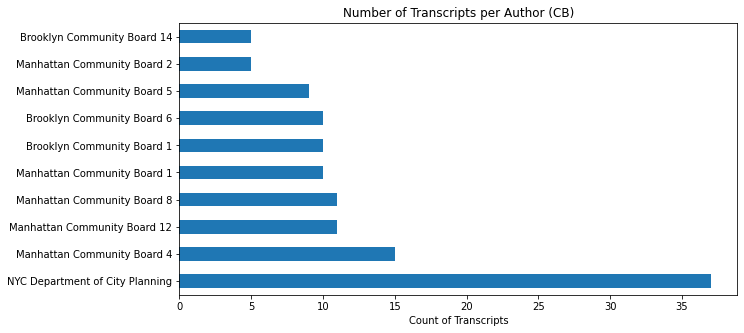

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
housing_subset.author.value_counts().head(10).plot(kind='barh')
plt.title('Number of Transcripts per Author (CB)')
plt.xlabel('Count of Transcripts')

In [8]:
cb_4 = housing_subset[housing_subset['author'] == 'Manhattan Community Board 4']

Found interesting transcript about transit oriented development and affordable housing. Will apply on the full transcript to see what housing related topics can be discovered.

In [19]:
case_study = cb_4[cb_4['title']=='Joint Chelsea Land Use & Transportation Planning Committee Webinar']

In [20]:
case_study

,Unnamed: 0,obj_id,video_url,author,publish_date,title,topic,fullTranscript,word_count,length,topic_label,topic_label_count,topic_count,neighbourhood.character,character.of.the.neighbourhood,character_total,key_sentence
37,37,605159ab466fb6cf06ab1101,https://www.youtube.com/watch?v=r7GacntRJFc,Manhattan Community Board 4,2021-03-16,Joint Chelsea Land Use & Transportation Planni...,"[[0.4115225672721863, 'Housing'], [0.327181845...","Marion, can you make sure phil knows how to ge...","{'building': 19, 'project': 18, 'plan': 24, 't...",3:46:15,character,3,{'\\bneighbou?rhood.character\\b': 3},3.0,NaN,3.0,['\nIf you would share the screen and then hol...


Rather than apply to the key sentences which tend to extract the topic without the context that we are looking for that likely won't include the anchor term.

In [9]:
# if we want to use the key_sentence instead
#all_sents = "".join([sent.replace("\\n", "") for sent in case_study.key_sentence.values])

In [26]:
demo_sentence = "Obviously, this is going to be a longer term plan, but this is an area that you know there was the East Midtown rezoning to really make sure that TOD development there was supported-and this is a very similar goal for here and in fact, obviously this is even a larger commuter locus than even Grand Central."

In [27]:
demo_sentence

'Obviously, this is going to be a longer term plan, but this is an area that you know there was the East Midtown rezoning to really make sure that TOD development there was supported-and this is a very similar goal for here and in fact, obviously this is even a larger commuter locus than even Grand Central.'

In [ ]:
# Created by processing a string of text with the nlp object
demo_doc = nlp(case_study)

In [28]:
# Created by processing a string of text with the nlp object
demo_doc = nlp(demo_sentence)

## Working With Text
https://applied-language-technology.mooc.fi/html/notebooks/part_ii/03_basic_nlp.html

### Analyze POS tagging

Coarse and fine-grained tags are stored under the attributes pos_ and tag_, respectively.

In [29]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in demo_doc:
    
    # Print the token and the POS tags
    print(token, token.pos_, token.tag_)

Obviously ADV RB
, PUNCT ,
this DET DT
is AUX VBZ
going VERB VBG
to PART TO
be VERB VB
a DET DT
longer ADJ JJR
term NOUN NN
plan NOUN NN
, PUNCT ,
but CCONJ CC
this DET DT
is VERB VBZ
an DET DT
area NOUN NN
that DET WDT
you PRON PRP
know VERB VBP
there PRON EX
was VERB VBD
the DET DT
East PROPN NNP
Midtown PROPN NNP
rezoning VERB VBG
to PART TO
really ADV RB
make VERB VB
sure ADJ JJ
that SCONJ IN
TOD PROPN NNP
development NOUN NN
there PRON EX
was AUX VBD
supported VERB VBN
- PUNCT :
and CCONJ CC
this DET DT
is VERB VBZ
a DET DT
very ADV RB
similar ADJ JJ
goal NOUN NN
for ADP IN
here ADV RB
and CCONJ CC
in ADP IN
fact NOUN NN
, PUNCT ,
obviously ADV RB
this DET DT
is VERB VBZ
even ADV RB
a DET DT
larger ADJ JJR
commuter NOUN NN
locus NOUN NN
than SCONJ IN
even ADV RB
Grand PROPN NNP
Central PROPN NNP
. PUNCT .


#### Morphological analysis

Morphemes - smallest unit of grammatical meaning that shape the external form of a word

spaCy stores the results under morph Token object

In [30]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in demo_doc:

    # Print the token and the results of morphological analysis
    print(token, token.morph)

Obviously 
, PunctType=Comm
this Number=Sing|PronType=Dem
is Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
going Aspect=Prog|Tense=Pres|VerbForm=Part
to 
be VerbForm=Inf
a Definite=Ind|PronType=Art
longer Degree=Cmp
term Number=Sing
plan Number=Sing
, PunctType=Comm
but ConjType=Cmp
this Number=Sing|PronType=Dem
is Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
an Definite=Ind|PronType=Art
area Number=Sing
that 
you Case=Nom|Person=2|PronType=Prs
know Tense=Pres|VerbForm=Fin
there AdvType=Ex
was Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
the Definite=Def|PronType=Art
East NounType=Prop|Number=Sing
Midtown NounType=Prop|Number=Sing
rezoning Aspect=Prog|Tense=Pres|VerbForm=Part
to 
really 
make VerbForm=Inf
sure Degree=Pos
that 
TOD NounType=Prop|Number=Sing
development Number=Sing
there AdvType=Ex
was Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
supported Aspect=Perf|Tense=Past|VerbForm=Part
- 
and ConjType=Cmp
this Number=Sing|PronType=Dem
is Mood=Ind

If it does not have morphological information, the token is considered as a free morpheme which stands alone.

To retrieve morphological information from a Token object, we must use the get() method of the morph attribute.

We can use the brackets [] to access items in the Doc object.

In [37]:
demo_doc[25], demo_doc[25].morph.get('Aspect'), demo_doc[25].morph.get('Number')

(rezoning, ['Prog'], [])

_Morphosyntax_
Classify according to shared inflectional categories such as tense, aspect, mood, number, gender or case, organizes such.

In linguistics, `aspect` is a grammatical category that expresses how an action, event, or state, denoted by a verb, extends over time.

In linguistics, `number` is a grammatical category of nouns, pronouns, adjectives and verb agreement that expresses count distinctions (such as "one", "two" or "three or more").

In [38]:
# get all morphological information available
demo_doc[25].morph.to_dict()

{'Aspect': 'Prog', 'Tense': 'Pres', 'VerbForm': 'Part'}

### Syntactic Parsing

In [39]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in demo_doc:
    
    # Print the token and its dependency tag
    print(token, token.dep_)

Obviously advmod
, punct
this nsubj
is aux
going ROOT
to aux
be xcomp
a det
longer amod
term compound
plan attr
, punct
but cc
this nsubj
is conj
an det
area attr
that dobj
you nsubj
know parataxis
there expl
was relcl
the det
East compound
Midtown attr
rezoning acomp
to aux
really advmod
make xcomp
sure acomp
that mark
TOD compound
development nsubjpass
there advmod
was auxpass
supported ccomp
- punct
and cc
this nsubj
is conj
a det
very advmod
similar amod
goal attr
for prep
here pcomp
and cc
in conj
fact pobj
, punct
obviously advmod
this nsubj
is conj
even advmod
a det
larger amod
commuter compound
locus attr
than prep
even advmod
Grand compound
Central pobj
. punct


Additional attributes available for each Token:

`i`: the position of the Token in the Doc

`token`: the Token itself

`dep_`: a tag for the syntactic relation

`head` and `i`: the Token that governs the current Token and its index

In [40]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in demo_doc:
    
    # Print the index of current token, the token itself, the dependency, the head and its index
    print(token.i, token, token.dep_, token.head.i, token.head)

0 Obviously advmod 4 going
1 , punct 4 going
2 this nsubj 4 going
3 is aux 4 going
4 going ROOT 4 going
5 to aux 6 be
6 be xcomp 4 going
7 a det 10 plan
8 longer amod 10 plan
9 term compound 10 plan
10 plan attr 6 be
11 , punct 4 going
12 but cc 4 going
13 this nsubj 14 is
14 is conj 4 going
15 an det 16 area
16 area attr 14 is
17 that dobj 19 know
18 you nsubj 19 know
19 know parataxis 21 was
20 there expl 21 was
21 was relcl 16 area
22 the det 24 Midtown
23 East compound 24 Midtown
24 Midtown attr 21 was
25 rezoning acomp 21 was
26 to aux 28 make
27 really advmod 28 make
28 make xcomp 25 rezoning
29 sure acomp 28 make
30 that mark 35 supported
31 TOD compound 32 development
32 development nsubjpass 35 supported
33 there advmod 32 development
34 was auxpass 35 supported
35 supported ccomp 29 sure
36 - punct 14 is
37 and cc 14 is
38 this nsubj 39 is
39 is conj 14 is
40 a det 43 goal
41 very advmod 42 similar
42 similar amod 43 goal
43 goal attr 39 is
44 for prep 43 goal
45 here pcomp 4

In [44]:
displacy.render(demo_doc, style='dep', jupyter=True, options={'compact': True})

Understand what a particular tag means, helpful tool!

In [51]:
spacy.explain('advmod')

'adverbial modifier'

Underscores `_` in attribute names is how spaCy encodes strings, they are mapped to hash values or numerical representation for computational efficiency.

In [52]:
print(demo_doc[0], demo_doc[0].dep, demo_doc[0].dep_)

Obviously 400 advmod


The hash value of 400 is reserved for the tag corresponding to advmod or 'adverbial modifier'.

If you want human-readable output for dependency parsing and spaCy returns sequences of numbers, then you most likely forgot to add the underscore to the attribute name.

## Sentence segmentation

In [62]:
multi_sent_demo_doc = nlp(case_study.loc[37]['fullTranscript'][:650])

In [66]:
case_study.loc[37]['fullTranscript'][:650]

"Marion, can you make sure phil knows how to get in and joins us because he's in the q and a part gal I don't know so just one sec, holly Jesse janine, just two points here before I give the intro and we get going marion.\nCan you make sure phil yeah, sorry Jeffrey, I'm just that's: okay!\nI know you got to keep bringing folks over yeah just get live streaming, I'm just getting live streaming up, sure and then holly. You said: angel's gonna be running the powerpoint. So usually we don't share screen with others.\nSo Janine are you able to make angel santana co-host, so he can drive a power point I i've just done that. So he's perfect! He's fine t"

In [63]:
multi_sent_demo_doc

Marion, can you make sure phil knows how to get in and joins us because he's in the q and a part gal I don't know so just one sec, holly Jesse janine, just two points here before I give the intro and we get going marion.
Can you make sure phil yeah, sorry Jeffrey, I'm just that's: okay!
I know you got to keep bringing folks over yeah just get live streaming, I'm just getting live streaming up, sure and then holly. You said: angel's gonna be running the powerpoint. So usually we don't share screen with others.
So Janine are you able to make angel santana co-host, so he can drive a power point I i've just done that. So he's perfect! He's fine t

Interesting, when the '\n' is encoded in the full transcript, SpaCy doesn't show it in the tokenized form but processes it as a sentence.

In [67]:
# Loop over sentences in the Doc object and count them using enumerate()
for number, sent in enumerate(multi_sent_demo_doc.sents):
    # Print the token and its dependency tag
    print(number, sent)

0 Marion, can you make sure phil knows how to get in and joins us because he's in the q and a part gal I don't know so just one sec, holly Jesse janine, just two points here before I give the intro and we get going marion.
1 

2 Can you make sure phil
3 yeah,
4 sorry Jeffrey, I'm just that's: okay!
5 

6 I know you got to keep bringing folks over
7 yeah just get live streaming, I'm just getting live streaming up, sure and then holly.
8 You said: angel's gonna be running the powerpoint.
9 So usually we don't share screen with others.
10 

11 So Janine are you able to make angel santana co-host, so he can drive a power point
12 I i've just done that.
13 So he's perfect!
14 He's fine t


### Lemmatization

In [68]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in demo_doc:
    
    # Print the index of current token, the token itself, the dependency, the head and its index
    print(token, token.lemma_)

Obviously obviously
, ,
this this
is be
going go
to to
be be
a a
longer long
term term
plan plan
, ,
but but
this this
is be
an an
area area
that that
you you
know know
there there
was be
the the
East East
Midtown Midtown
rezoning rezone
to to
really really
make make
sure sure
that that
TOD TOD
development development
there there
was be
supported support
- -
and and
this this
is be
a a
very very
similar similar
goal goal
for for
here here
and and
in in
fact fact
, ,
obviously obviously
this this
is be
even even
a a
larger large
commuter commuter
locus locus
than than
even even
Grand Grand
Central Central
. .


### Named entity recognition

We can use the Doc object’s .ents attribute to get the named entities.

In [69]:
demo_doc.ents

(East Midtown, TOD, Grand Central)

Each item in the tuple is a spaCy Span object. Span objects can consist of multiple Token objects, as many named entities span multiple Tokens.

The named entities and their types are stored under the attributes .text and .label_ of each Span object.

In [70]:
# Loop over the named entities in the Doc object 
for ent in demo_doc.ents:

    # Print the named entity and its label
    print(ent.text, ent.label_)

East Midtown LOC
TOD ORG
Grand Central ORG


In [74]:
type(demo_doc.ents[0])

spacy.tokens.span.Span

printing out the start and end attributes for the first named entity in the document. The end is the attribute where the span has actually ended, or the next token.

In [75]:
# Print the named entity and indices of its start and end Tokens
print(demo_doc.ents[0], demo_doc.ents[0].start, demo_doc.ents[0].end)

East Midtown 23 25


In [77]:
demo_doc[25]

rezoning

In [78]:
displacy.render(demo_doc, style='ent')

# Customizing the spaCy pipeline